In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Sanchit Dakle\OneDrive\Desktop\Excelar\sales_data_with_discounts.csv")

In [3]:
data


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
data.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [5]:
numerical_columns=data.select_dtypes(include=['number']).columns


In [6]:
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [7]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# Data visualization

# Data visualization using Histogram plot

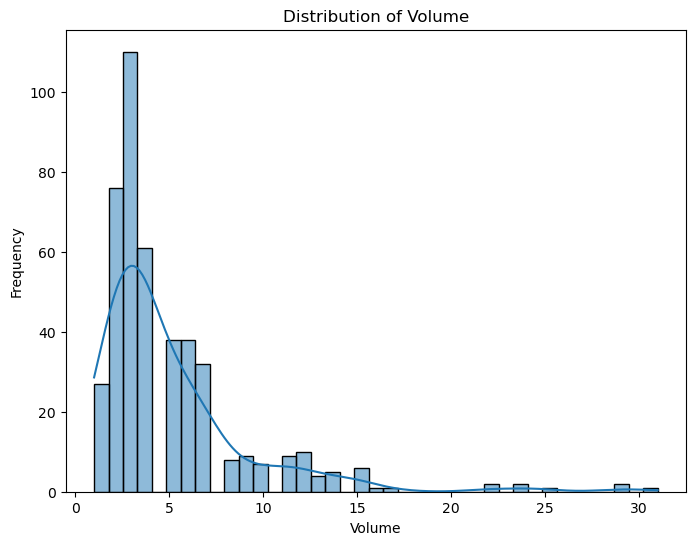

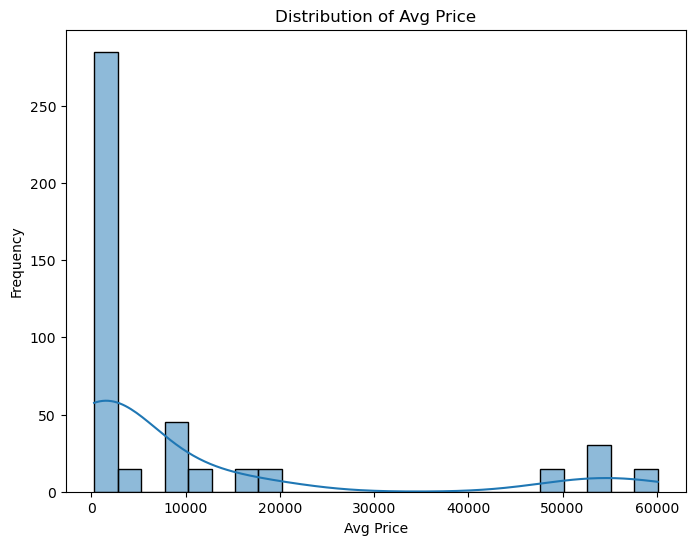

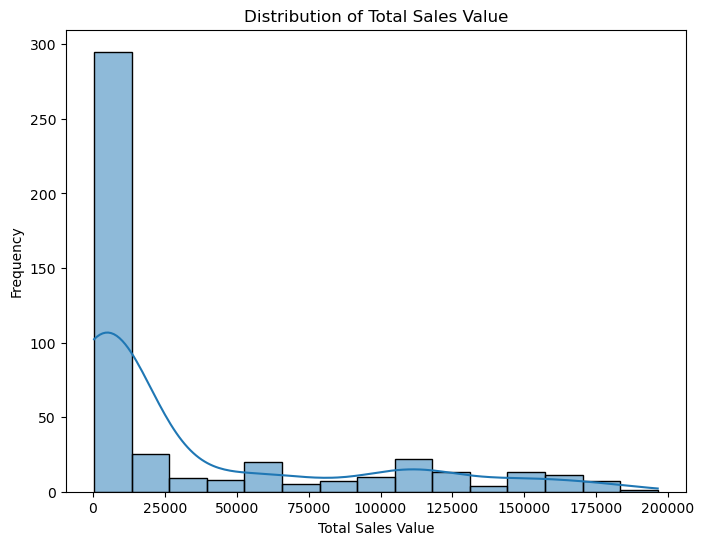

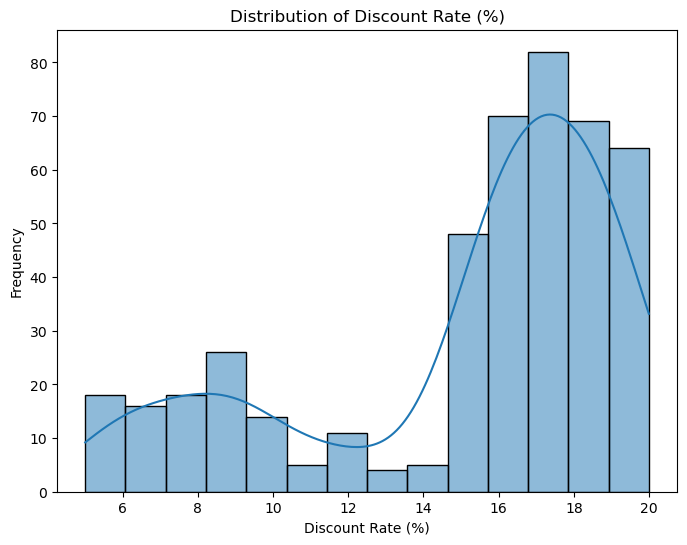

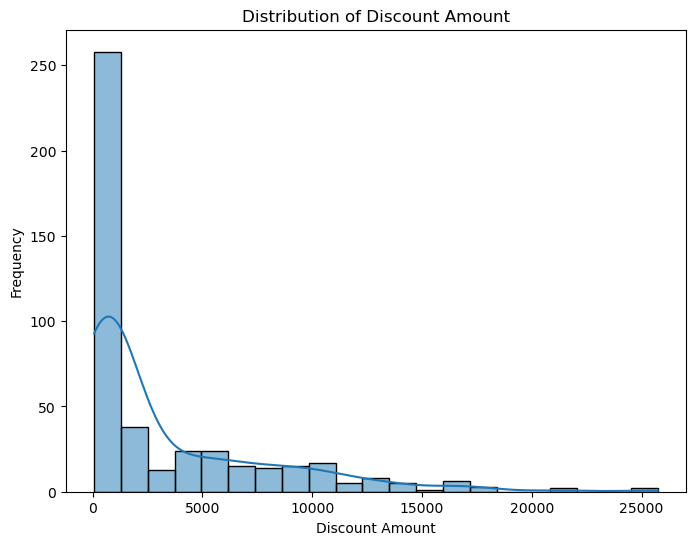

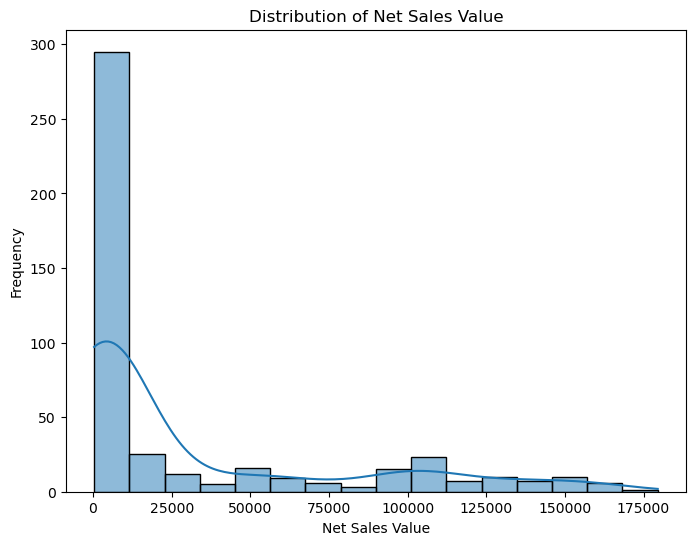

In [10]:
for column in numerical_columns:
  plt.figure(figsize=(8,6))
  sns.histplot(data[column],kde=True)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')



# Data visulization using Boxplot

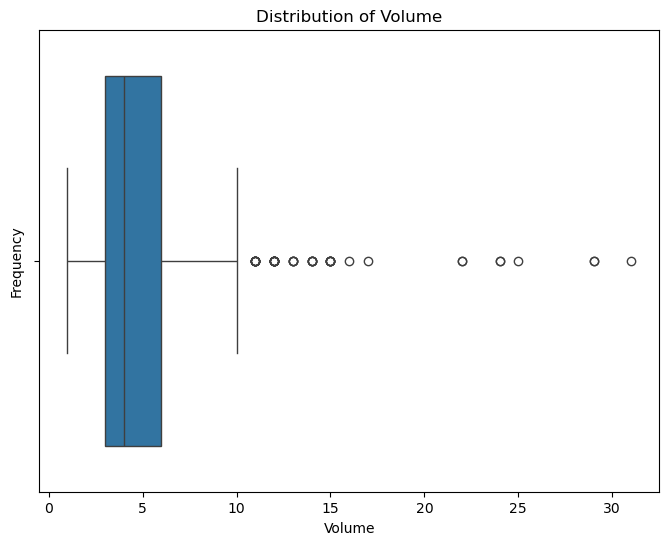

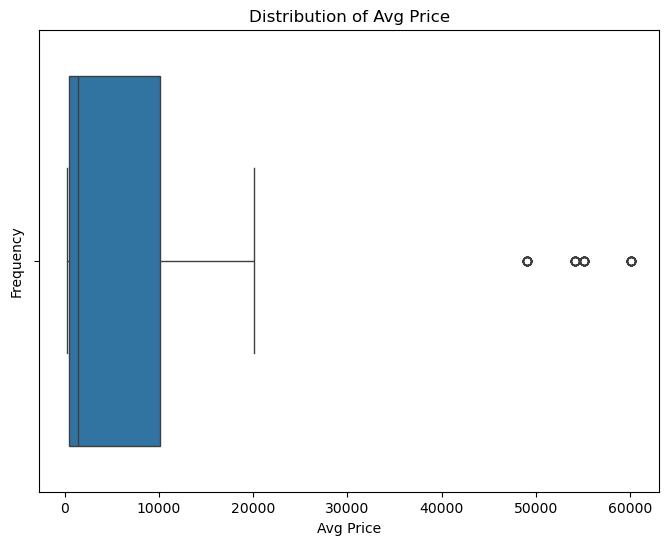

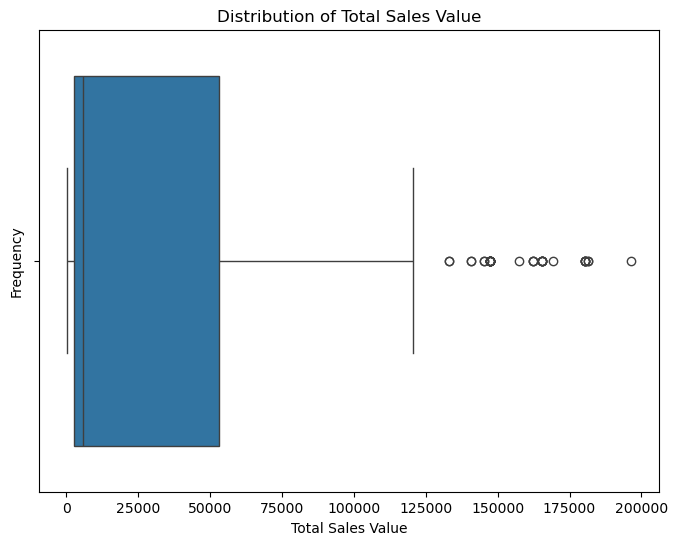

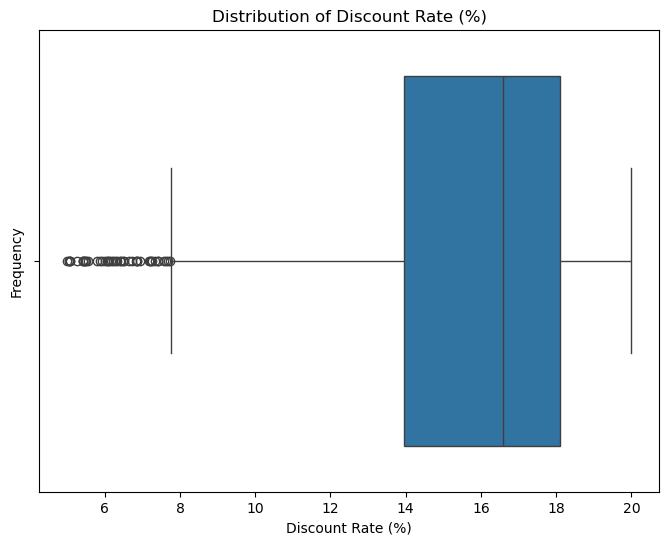

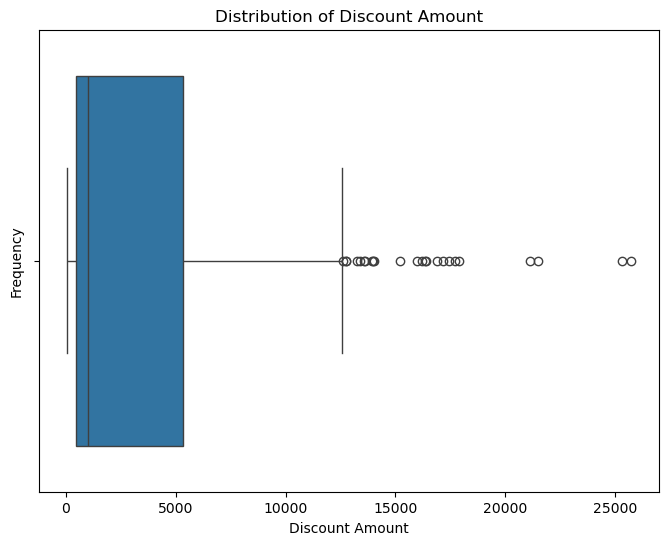

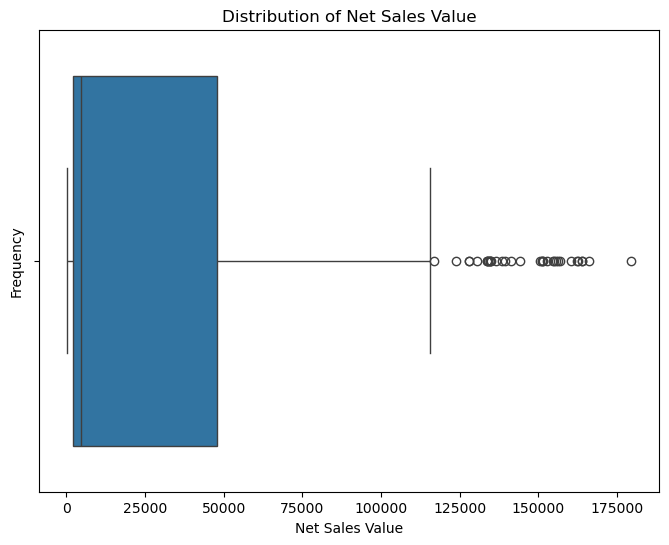

In [12]:
for column in numerical_columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=data[column])
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')

# Bar chart Analysis for categorical column

In [14]:
categorical_columns=data.select_dtypes(include=['object']).columns

In [15]:
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

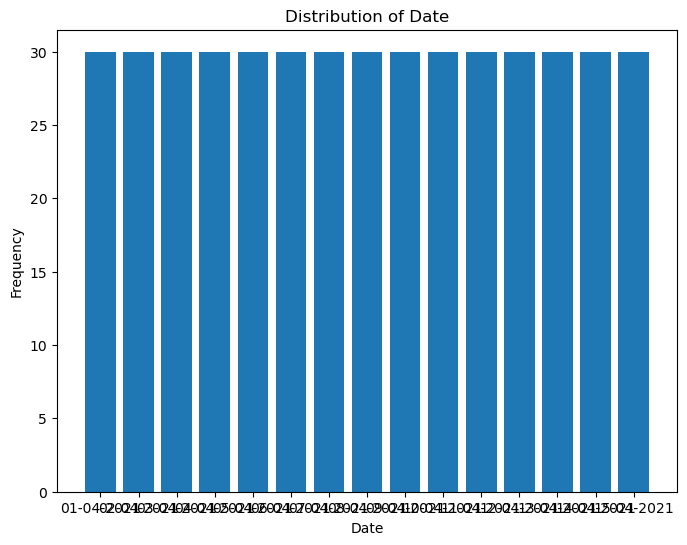

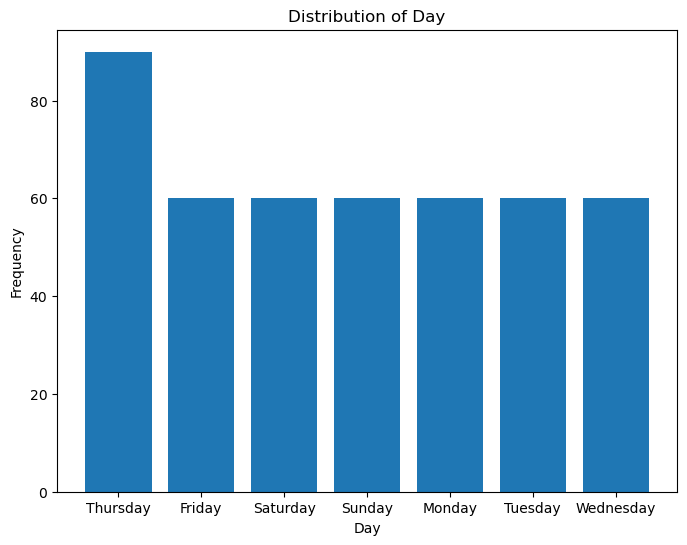

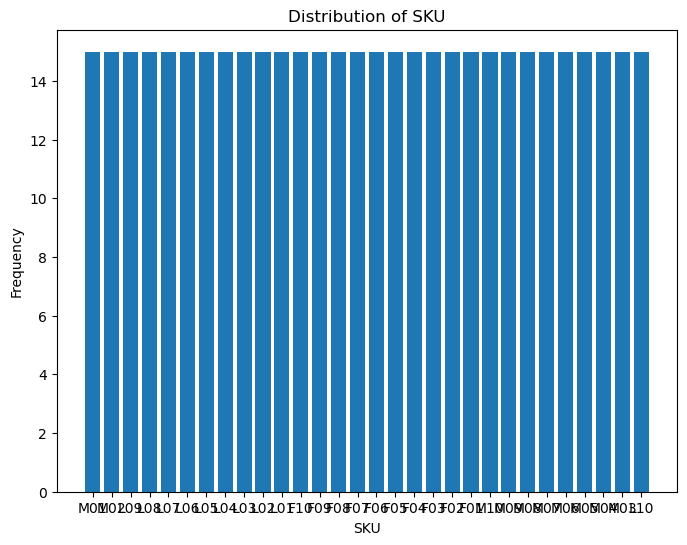

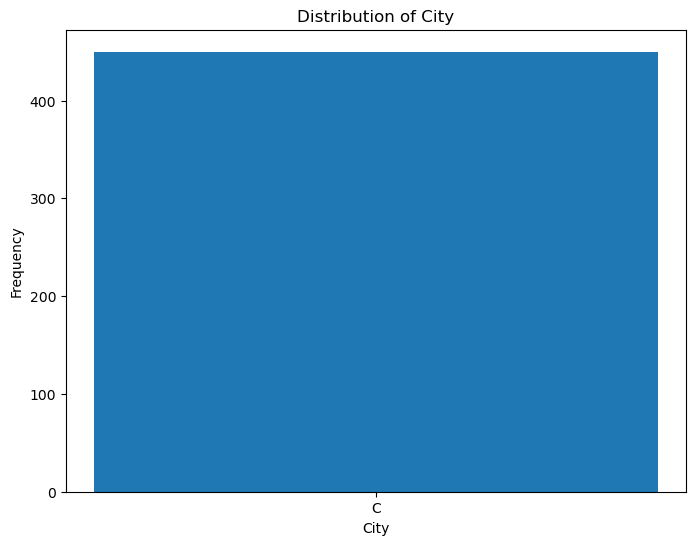

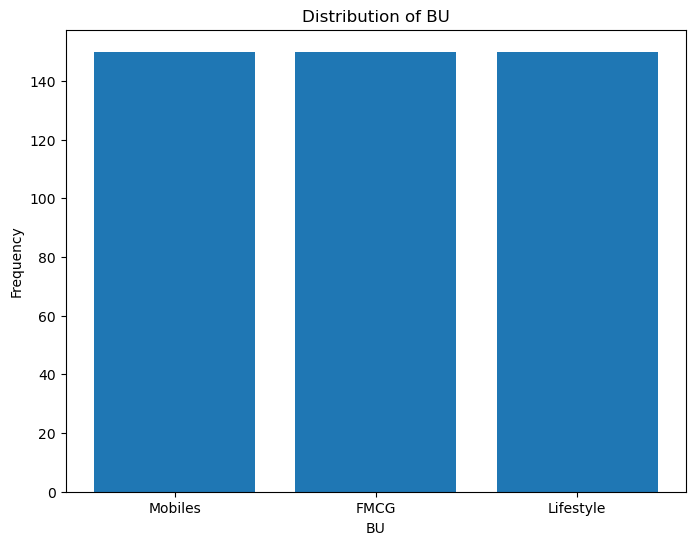

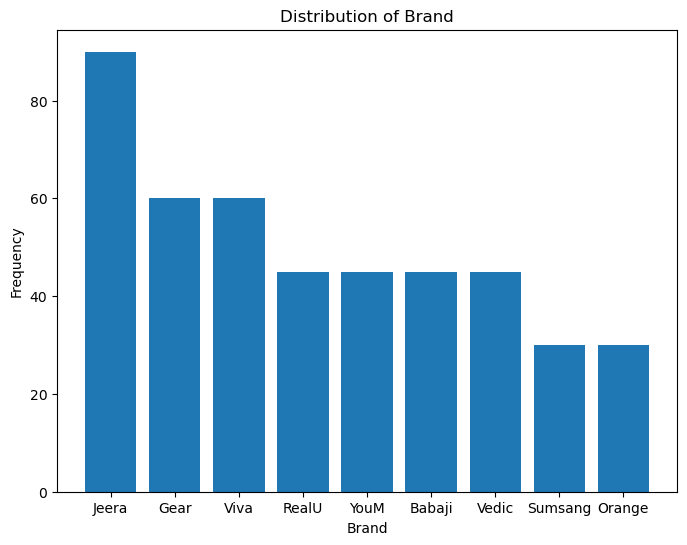

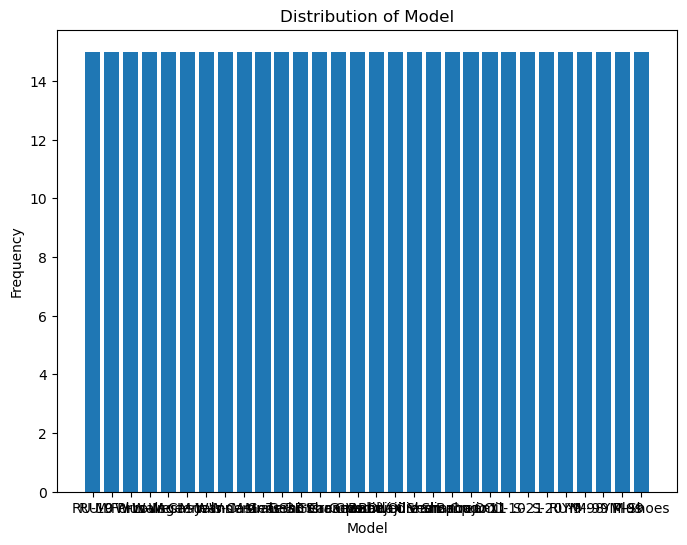

In [16]:
for column in categorical_columns:
  plt.figure(figsize=(8,6))
  plt.bar(data[column].value_counts().index,data[column].value_counts().values)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')

# Standardization for numerical variables

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
data_standardized=data.copy()
data_standardized[numerical_columns]=sc.fit_transform(data[numerical_columns])

In [20]:
data_standardized


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.725512,Lifestyle,Jeera,M-Casuals,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,15-04-2021,Thursday,L07,C,0.220808,Lifestyle,Viva,W-Western,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,15-04-2021,Thursday,L08,C,-0.725512,Lifestyle,Viva,W-Lounge,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,15-04-2021,Thursday,L09,C,-0.488932,Lifestyle,Jeera,M-Formals,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


# Before and After data standardization

In [22]:
import pandas as pd
print('before standardized')
print(data[numerical_columns].describe())
print('after standardization')
print(data_standardized[numerical_columns].describe())


before standardized
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     4

# Conversion of categorical data into dummy variable

In [24]:
data=pd.get_dummies(data,columns=categorical_columns)


In [25]:
data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Conclusion


In [ ]:
# Descriptive Analytics: The mean, median, and standard deviation provided insights into sales and discount patterns. We observed certain skewed distributions, which could indicate anomalies.
# Data Visualizations: Histograms and boxplots helped identify outliers, skewness, and distribution characteristics. Bar charts showed category frequency distributions.
# Standardization: This step ensured that all numerical variables were on the same scale, an important step before applying machine learning algorithms.
# One-Hot Encoding: Categorical variables were transformed to be machine-readable, setting the stage for model development.
# Importance of Data Preprocessing: Techniques like standardization and one-hot encoding are critical to ensure that the dataset is compatible with machine learning algorithms. Proper preprocessing improves model accuracy and performance.